Note: through this exam you should only make use of numpy, matplotlib and pandas.

#Q1

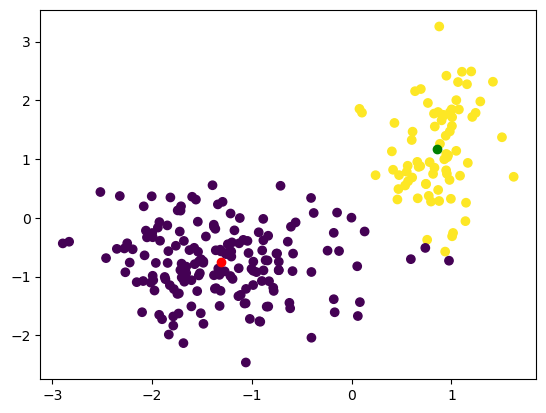

[-1.31247206 -0.75024239] [0.85479773 1.17420677]


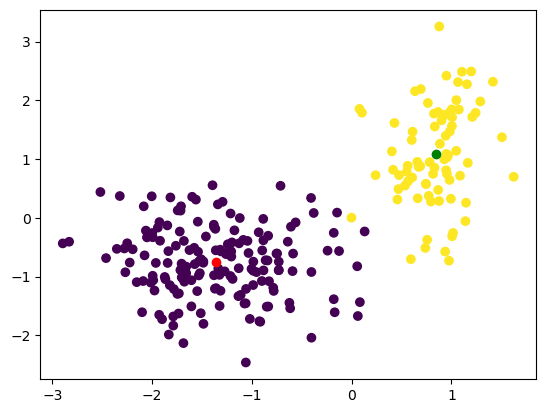

[-1.35717435 -0.75648152] [0.8410398 1.0921897]


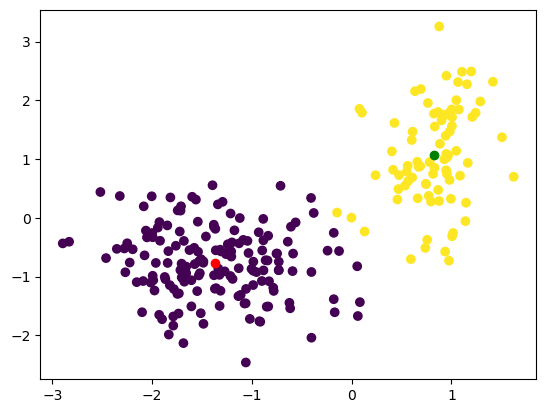

[-1.37333004 -0.7646729 ] [0.82057682 1.06412484]


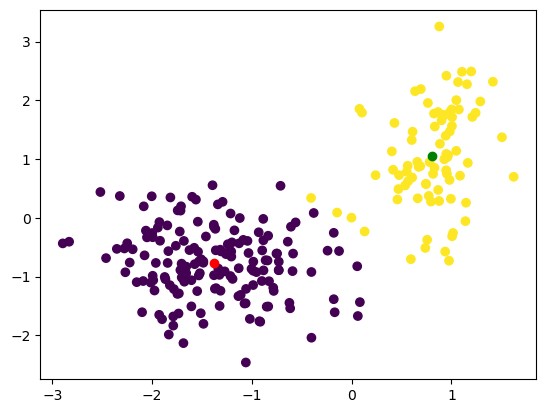

[-1.37915101 -0.77131269] [0.80596223 1.05547495]


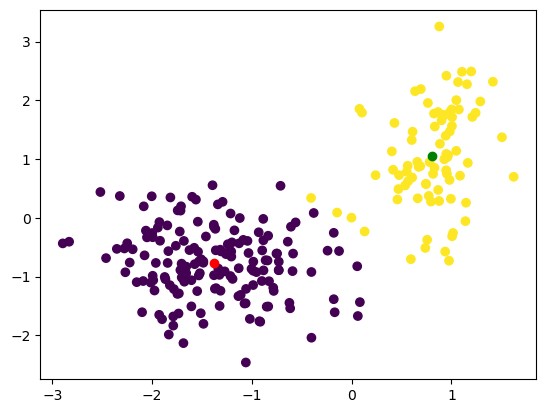

[-1.37915101 -0.77131269] [0.80596223 1.05547495]


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d1.csv")
x1 = df['x1']
x2 = df['x2']

#Continue here...
x1 = np.array(x1).reshape(-1, 1)
x2 = np.array(x2).reshape(-1, 1)
# plt.scatter(x1, x2)
# plt.show()

m1 = np.array([-1, -1])
m2 = np.array([2, 1])

def L2(x1_array, x2_array, mean):
    d1 = (x1_array - mean[0]) ** 2
    d2 = (x2_array - mean[1]) ** 2
    return np.sum(d1 + d2, axis=1)

for _ in range(5):
    dist1 = L2(x1, x2, m1)
    dist2 = L2(x1, x2, m2)
    y = np.where(dist1 < dist2, 1, 2)
    m1 = np.array([x1[y==1].mean(), x2[y==1].mean()])
    m2 = np.array([x1[y==2].mean(), x2[y==2].mean()])
    plt.scatter(x1, x2, c=y)
    plt.scatter(m1[0], m1[1], c="red")
    plt.scatter(m2[0], m2[1], c="green")
    plt.show()
    print(m1, m2)

#Q2

[-1.34920307 -0.75202036] 
 [[0.36348015 0.        ]
 [0.         0.35494227]]
[0.85157853 1.10581811] 
 [[0.07902776 0.        ]
 [0.         0.67727456]]


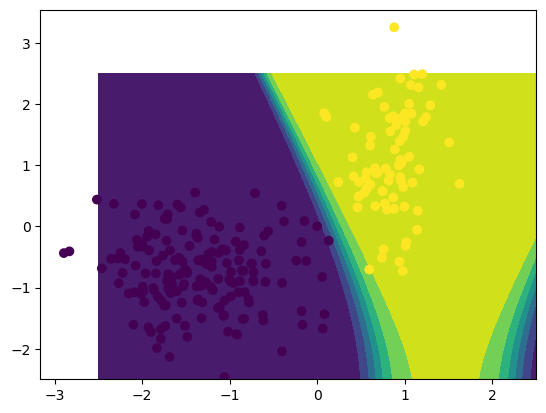

In [21]:
#This function may be useful to define the sampling grid for this question
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

#this function may be useful to calculate the probability density function for a given set of means and covariance
def prob_density_2d(test_vals=np.array([[0], [0]]), mean1=0, mean2=0, covar_mat=np.array([[1, 0],[0, 1]]) ):
  #test_vals is an m x 2 numpy array containing all the values at which to perform the calculation
  #mean1, mean2 are the means in dimensions 1 and 2 respectively
  #covar_mat is a 2 x 2 covariance matrix
  #returns probability density values for each of the m values
  return 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar_mat))) * np.exp(
    -1 / 2 * (np.matmul((test_vals-np.array((mean1,mean2)).T), np.linalg.inv(covar_mat)) 
    * (test_vals-np.array((mean1,mean2)).T)).sum(-1))

df = pd.read_csv("http://pogo.software/me4ml/rjteh/d2.csv")
x1 = df['x1']
x2 = df['x2']
clTrue = df['y']

#Continue 2(a) and 2(b) here...
x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(clTrue)

m1 = np.array([x1[y==1].mean(), x2[y==1].mean()])
m2 = np.array([x1[y==2].mean(), x2[y==2].mean()])

var11 = np.var(x1[y==1])
var21 = np.var(x2[y==1])
var12 = np.var(x1[y==2])
var22 = np.var(x2[y==2])

cov1 = np.array([[var11, 0],
                [0, var21]])

cov2 = np.array([[var12, 0],
                [0, var22]])

print(m1, "\n", cov1)
print(m2, "\n", cov2)


Xgrid, x1line, x2line = gen_sample_grid(npx=200, npy=200, limit=2.5)

#p(w|x) = p(x|w) * p(w) / p(x)

px_w1 = prob_density_2d(Xgrid, m1[0], m1[1], cov1)
px_w2 = prob_density_2d(Xgrid, m2[0], m2[1], cov2)

pw1 = len(x1[y==1]) / len(x1)
pw2 = 1 - pw1

px = px_w1 * pw1 + px_w2 * pw2

pw1_x = (px_w1 * pw1) / px
pw2_x = (px_w2 * pw2) / px

y_pred = np.where(pw2_x > pw1_x, 2, 1)

plt.contourf(x1line, x2line, pw2_x.reshape(200, 200))
plt.scatter(x1, x2, c=y)
plt.show()

#Q2 (c)

Answer here...

#Q2 (d)

Answer here...

#Q3

In [ ]:
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d3.csv")
x = df['x']
y = df['y']

#Continue here...

#Q4 (a)

In [24]:
#Continue here... 
#or write out as a text field if you wish.
sv11 = np.array([0, 0])
sv12 = np.array([0.4,1])
sv2 = np.array([1, 0])

m = (sv11[1] - sv12[1])/(sv11[0] - sv12[0])

#y = mx + c
#c = y - mx
mid = (sv11 + sv2) / 2 # On boundary 
c = mid[1] - m * mid[0]

print(f"y = {m}x + {c}")

y = 2.5x + -1.25


#Q4 (b)

Answer here...